
# ***Assignement 1***


# **Import of the data and libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from tensorflow.keras.initializers import Constant
from keras.optimizers import SGD

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


Import the dataset from Google Drive



In [4]:
df = pd.read_csv ("drive/MyDrive/AML/Assignement1/train.csv")

# **Inspecting the data**

Let's take a look to how the dataset looks like with the "head()" function and to the tyoes of each attribute:

---



In [5]:
print(df.head())

      ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  19193     200000    2          1         1   38     -2     -2     -2   
1   1131     230000    2          2         1   34      0      0      0   
2  17557      50000    2          2         2   42      0      0      0   
3  29901      20000    1          2         2   29      0      0     -2   
4  14696      30000    2          3         1   59      1      2      2   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...       2571       2571       2571      2772      2571      2571   
1      0  ...     155335     153427     150514      8913      5449      5339   
2      0  ...      49311      24663      24854      1763      2112      1756   
3     -2  ...          0          0          0         0         0         0   
4      2  ...      30467      29858      28898      1950       200      2492   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

We can already see that there are some attributes that are categorical. We are going to one-hot encode these attributes to help the network

In [6]:
print('Unique values for SEX: ', df.SEX.unique())
print('Unique values for EDUCATION: ', df.EDUCATION.unique())
print('Unique values for MARRIAGE: ', df.MARRIAGE.unique())
print('Unique values for PAY_0: ', df.PAY_0.unique())
print('Unique values for PAY_2: ', df.PAY_2.unique())
print('Unique values for PAY_3: ', df.PAY_3.unique())
print('Unique values for PAY_4: ', df.PAY_4.unique())
print('Unique values for PAY_5: ', df.PAY_5.unique())
print('Unique values for PAY_6: ', df.PAY_6.unique())

Unique values for SEX:  [2 1]
Unique values for EDUCATION:  [1 2 3 5 4 6 0]
Unique values for MARRIAGE:  [1 2 3 0]
Unique values for PAY_0:  [-2  0  1 -1  2  3  6  5  4  8  7]
Unique values for PAY_2:  [-2  0  2 -1  1  5  3  4  7  6  8]
Unique values for PAY_3:  [-2  0  2 -1  4  3  6  7  5  8  1]
Unique values for PAY_4:  [-2  0  2 -1  3  5  7  4  8  1  6]
Unique values for PAY_5:  [-2  0  2 -1  3  4  7  5  6  8]
Unique values for PAY_6:  [-2  0 -1  2  3  5  7  4  6  8]


Let's inspect the type of each attribute:

In [7]:
df.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


Let's evaluate the target distribution: we can see that the dataset it's very unbalanced (there are a lot of examples with target 0)

default payment next month
0    19815
1     5685
Name: count, dtype: int64 

Percentage of "0":  77.70588235294117 %
Percentage of "1": 22.29411764705882 %


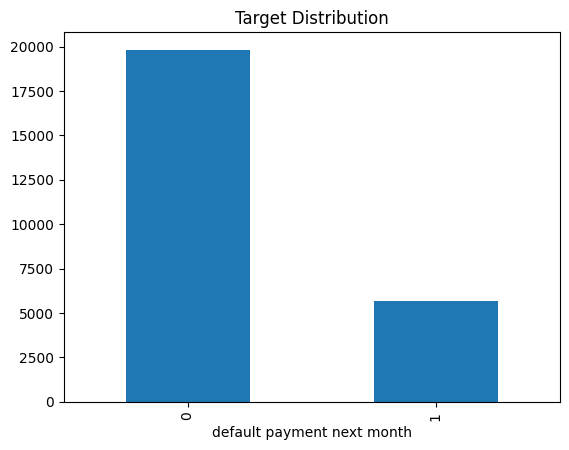

In [8]:
values = df['default payment next month'].value_counts()
print(values, "\n")

values.plot(title='Target Distribution', kind='bar')

perc = values[0]/df['default payment next month'].count()
print(f"Percentage of \"0\":  {perc*100} %\nPercentage of \"1\": {(1-perc)*100} %")

We can also see that there are no missing values in the dataset:

In [9]:
print("Missing values in training data:\n", df.isnull().sum())

Missing values in training data:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [10]:
print("Statistic of the training dataset:\n", df.describe())

Statistic of the training dataset:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  25500.00000    25500.000000  25500.000000  25500.000000  25500.000000   
mean   14956.95702   167569.007059      1.604118      1.852353      1.550392   
std     8667.36982   130002.156470      0.489049      0.787991      0.522757   
min        1.00000    10000.000000      1.000000      0.000000      0.000000   
25%     7432.75000    50000.000000      1.000000      1.000000      1.000000   
50%    14942.50000   140000.000000      2.000000      2.000000      2.000000   
75%    22431.25000   240000.000000      2.000000      2.000000      2.000000   
max    30000.00000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  25500.000000  25500.000000  25500.000000  25500.000000  25500.000000   
mean      35.509294     -0.013098     -0.130784     -0.163294     -0.218235   
std   

# **Preparing the data**

Preprocess the data:

*   Normalize the dataset
*   One-hot encoding of the categorical attributes, as described above
*   Delete a useless column like ("ID") beacause It's just the enumaration of the instances and save the column ("default payment next month"), that's our "target", in another array
*   Split the dataset using "train_test_split" from "sklearn.model_selection" to have a test set (20% of the dataset) and a training set, so we can have some istances that the model never saw to evaluate it:

In [11]:
categorical_attributes = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

encoder = preprocessing.OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(df[categorical_attributes])
one_hot_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(categorical_attributes), index=df.index)

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(columns=categorical_attributes + ["ID"], axis=1)
output = df_encoded.pop('default payment next month')

scaler = preprocessing.StandardScaler().fit(df_encoded)
x = scaler.transform(df_encoded)

x_train, x_test, y_train, y_test = train_test_split(x, output, test_size=0.2, random_state=42)

# ***Building the Network***

Create a FNN with the input dimension equal to the input shape (91 neurons), with some hidden layers and a single neuron as the output.

I did some trial and error over several hyper-parameters of the NN (number of layers, shape of layers, activation function, learning rate...), and theese are the best choices I found:
- 3 hidden layers, all activated by 'RELU' (as standars), with 128, 64 and 32 neuron each one
- *sigmoid* as the output function, so we obtain for each example a probability between 0 and 1 (later we are going to divide the examples in two classe with a  threshold)

In [12]:
dim = x_train.shape[1]
print (f"Input Shape: {dim}")

print(f"Dimensions:\nx_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}")

model = Sequential()

model.add(Input(shape=(dim,)))
model.add(Dense(128, activation='relu', bias_initializer=Constant(0)))
model.add(Dense(64, activation='relu', bias_initializer=Constant(0)))
model.add(Dense(32, activation='relu', bias_initializer=Constant(0)))
model.add(Dense(1, activation='sigmoid'))

Input Shape: 91
Dimensions:
x_train: (20400, 91)
y_train: (20400,)
x_test: (5100, 91)
y_test: (5100,)


Let's see a recap of the FNN

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          11,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,145 (86.50 KB)

 Trainable params: 22,145 (86.50 KB)

 Non-trainable params: 0 (0.00 B)

Let's now compile the model:

* Optimization procedure: we are going to use SGD (Stocastic Gradient Descend), with a learning rate equal to 0.002. I tried with the 'adam' optimizer but the NN was fastly going in overfitting

* Loss function: 'cause the problem is a binary problem, we can use binary crossentropy as a loss function. It's also correct for our network because we are using a sigmoid function that contains an exponential therm, so using a loss function with a logarithm inside helps to avoid saturation problems.

* number of epochs: 200, if we are going to increase this value we are going to occur in overfitting

In [14]:
optimizer = SGD(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6907 - loss: 0.6475 - val_accuracy: 0.7735 - val_loss: 0.6036
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7653 - loss: 0.5898 - val_accuracy: 0.7809 - val_loss: 0.5680
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7771 - loss: 0.5588 - val_accuracy: 0.7809 - val_loss: 0.5430
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7856 - loss: 0.5254 - val_accuracy: 0.7863 - val_loss: 0.5234
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7950 - loss: 0.5076 - val_accuracy: 0.7892 - val_loss: 0.5077
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.5065 - val_accuracy: 0.7926 - val_loss: 0.4953
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.4837 - val_accuracy: 0.7961 - val_loss: 0.4856
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 0.4736 - val_accu

# ***Training Result***

Let's define some function to visualize the accuracy and the loss on both training and validation set during the epochs

In [16]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

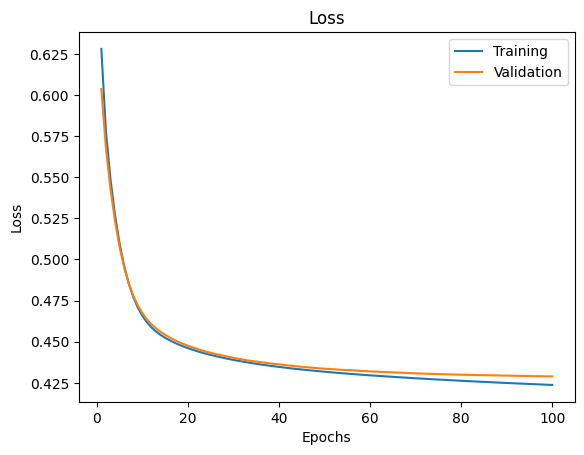

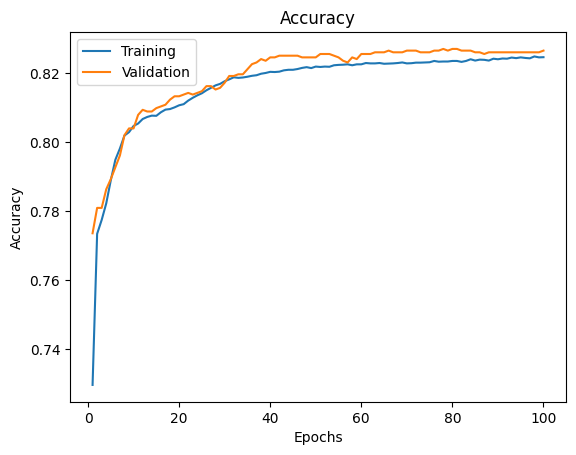

In [17]:
plot_loss(history)
plot_accuracy(history)

Let's also see a confusion matrix on the training examples

638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     15864
           1       0.69      0.39      0.50      4536

    accuracy                           0.82     20400
   macro avg       0.77      0.67      0.70     20400
weighted avg       0.81      0.82      0.81     20400



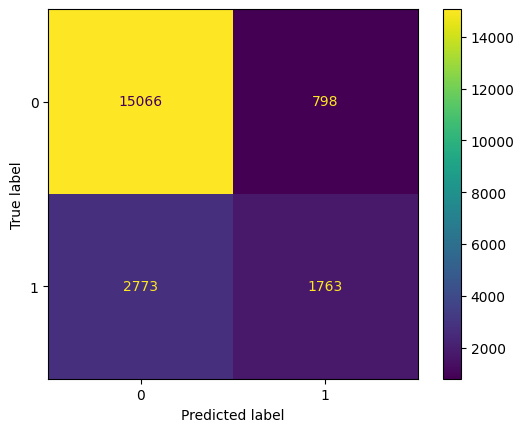

In [18]:
prediction_train = model.predict(x_train)
fixed_prediction_train = [1 if x >= 0.5 else 0 for x in prediction_train]

cm_train = confusion_matrix(y_train, fixed_prediction_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
print(classification_report(y_train, fixed_prediction_train))
disp_train.plot()
plt.show()

Let's have some consideration on these first results:
* We can see from the graphics that the model it's not overfitting because there isn't a significant gap between the test and validation accuracy (and also loss), but if we are going to increase the number of epochs the the overfitting problem occurs.
* From the confusion matrix we can see the effect of having such a unbalanced dataset: looking for the accuracy in this case is not a perfect choice: the model has a decent accuracy 'cause it's predicting '0' (the most frequent class) in the majority of the examples; because lot's of the examples are from this class, the model is guessing the right class. But if we look to the other class ("1"), we can see that in 2824 cases the model says 0, while only in 1712 cases it's saying the right class. This can also been seen from the recall and the f1-score of this class.
* To evaluate the model it's better to look at the f1-score instead of the accuracy, because we have an unbalanced dataset and the f1-score doesn't get influenced by this and give a more realistic idea on how the model behave

# ***Validate the model***

Let's now take the test set to predict the outcome. If the value of the probability computed by the sigmoid function is grater or equal than 0.5, then set the output to 1, otherwise set to 0.
Print a confusion matrix to see the results

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3951
           1       0.64      0.38      0.47      1149

    accuracy                           0.81      5100
   macro avg       0.74      0.66      0.68      5100
weighted avg       0.79      0.81      0.79      5100



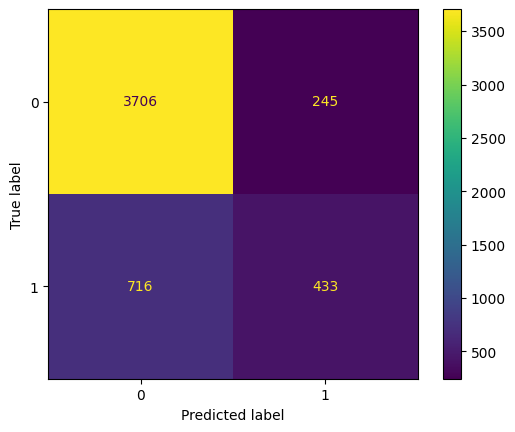

In [19]:
prediction_test = model.predict(x_test)
fixed_prediction_test = [1 if x >= 0.5 else 0 for x in prediction_test]


#y_pred_classes = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(y_test, fixed_prediction_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
print(classification_report(y_test, fixed_prediction_test))
disp_test.plot()
plt.show()

We can see that the NN is getting the same results on the test set than on the training set, so this confirm that it's not overfitting. We can see that still the accuracy it's prerry the same as above (0.81) but it is still a bad metrics to analize, because we can see that the model it's predicting 0 almost everywhere

Let's now try to plot the ROC curve to evaluate the model on different values of the thresholds

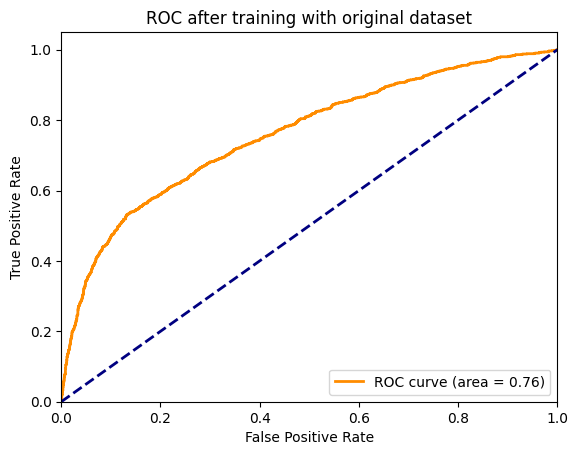

Optimal threshold: 0.29117826


In [20]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC after training with original dataset')
plt.legend(loc="lower right")
plt.show()

youden_index = tpr - fpr

optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

Let's now try to predict again with the optimal threshold that we found



In [21]:
optimal_prediction = [1 if x >= optimal_threshold else 0 for x in prediction_test]
print(classification_report(y_test, optimal_prediction))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3951
           1       0.54      0.53      0.54      1149

    accuracy                           0.79      5100
   macro avg       0.70      0.70      0.70      5100
weighted avg       0.79      0.79      0.79      5100



# ***Prediction***

Based on what I see in this project, I think that the NN is going tho work pretty as much the same on a new dataset, because it's not overfitting; of course I guess that the accuracy on the new dataset will still be a confusing metric, because the NN will be predict 0 many times as in my examples, and if the new dataset it's still unbalanced, the model is going to guess the righ class several times. So it will be more important to see the f1-score to understand the model capacity

In [22]:
df_new_test = pd.read_csv ("drive/MyDrive/AML/Assignement1/test.csv")

In [23]:
categorical_attributes = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

encoded_test_data = encoder.transform(df_new_test[categorical_attributes])
one_hot_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_attributes))
test_encoded = pd.concat([df_new_test, one_hot_df], axis=1)
test_encoded = test_encoded.drop(categorical_attributes, axis=1)

def preprocess_test(data):
    data = data.drop(columns=['ID'])
    data = np.array(data)
    scaler = preprocessing.StandardScaler().fit(data)
    x = scaler.transform(data)
    return x


x_final_test = preprocess_test(test_encoded)

In [24]:
x_final_test.shape

(4500, 91)

In [26]:
final_pred = model.predict(x_final_test)

fixed_final_pred = [1 if x >= optimal_threshold else 0 for x in final_pred]
prediction_df = pd.DataFrame(fixed_final_pred)
prediction_df.to_csv('drive/MyDrive/AML/Assignement1/prediction.csv', index=False)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
